 Data Import & Cleaning:

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv("city_day.csv")

# Show first few rows
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
# Check basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [9]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where date is missing
df = df.dropna(subset=['Date'])

# Fill missing numeric values with column mean
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [10]:
# Check missing values after cleaning
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

EDA (Exploratory Data Analysis) for your AQI dataset.

In [11]:
# Basic statistics
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531,29531.000000,29531.000000,29531.00000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,2018-05-14 05:40:15.807118080,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
min,2015-01-01 00:00:00,0.040000,0.010000,0.02000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,2017-04-16 00:00:00,32.150000,79.315000,6.21000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,2.000000,88.000000
50%,2018-08-05 00:00:00,58.030000,118.127103,11.53000,25.240000,27.550000,23.483476,0.950000,10.480000,34.491430,1.840000,6.930000,3.070128,138.000000
75%,2019-09-03 00:00:00,72.450000,118.127103,17.57473,34.665000,36.015000,23.483476,1.710000,14.531977,42.730000,3.280840,8.700972,3.070128,179.000000
max,2020-07-01 00:00:00,949.990000,1000.000000,390.68000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000
std,NaN,59.414476,71.500953,21.35922,22.941051,29.317936,20.711370,6.715753,16.909088,20.163443,14.226364,17.034769,3.932426,129.064348


C:\Users\user\AppData\Local\Temp\ipykernel_23948\1612905954.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index[:10], y=city_counts.values[:10], palette="viridis")


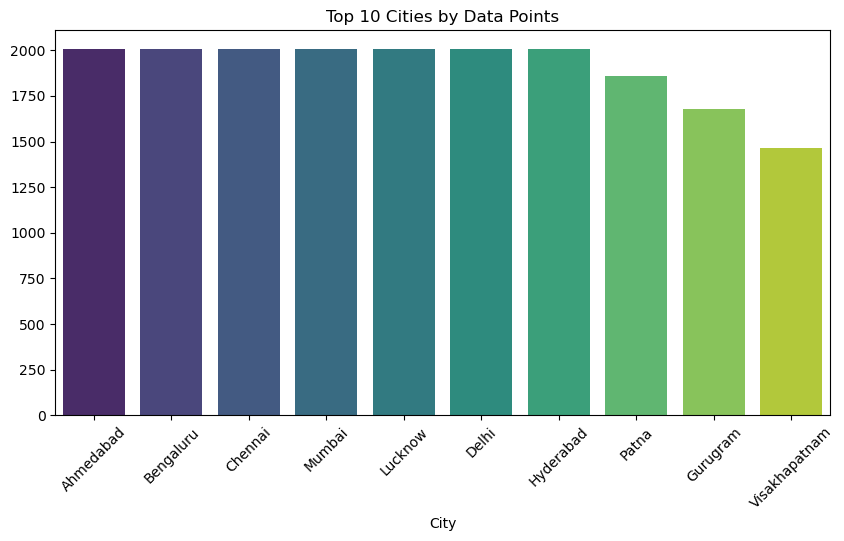

In [12]:
# Count of data points per city
city_counts = df['City'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=city_counts.index[:10], y=city_counts.values[:10], palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Data Points")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_23948\3350313837.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_aqi.index[:10], y=avg_aqi.values[:10], palette="mako")


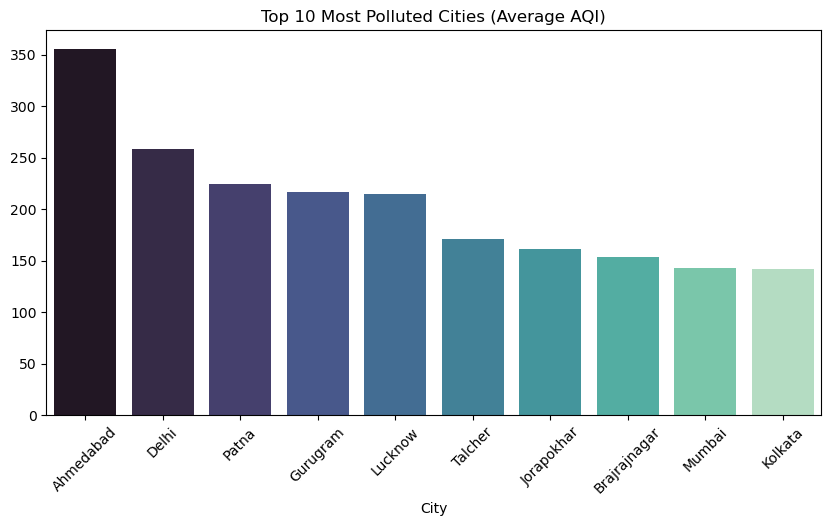

In [13]:
# Average AQI per city
avg_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_aqi.index[:10], y=avg_aqi.values[:10], palette="mako")
plt.xticks(rotation=45)
plt.title("Top 10 Most Polluted Cities (Average AQI)")
plt.show()

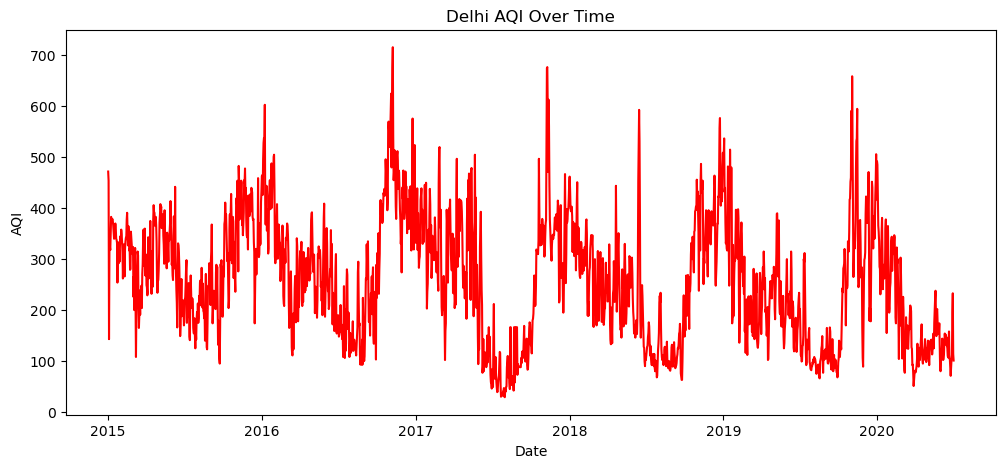

In [14]:
# AQI trend over time (example: Delhi)
delhi_data = df[df['City'] == 'Delhi']
plt.figure(figsize=(12,5))
plt.plot(delhi_data['Date'], delhi_data['AQI'], color='red')
plt.title("Delhi AQI Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_23948\2160685291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Month'] = delhi_data['Date'].dt.month
C:\Users\user\AppData\Local\Temp\ipykernel_23948\2160685291.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='AQI', data=delhi_data, palette="coolwarm")


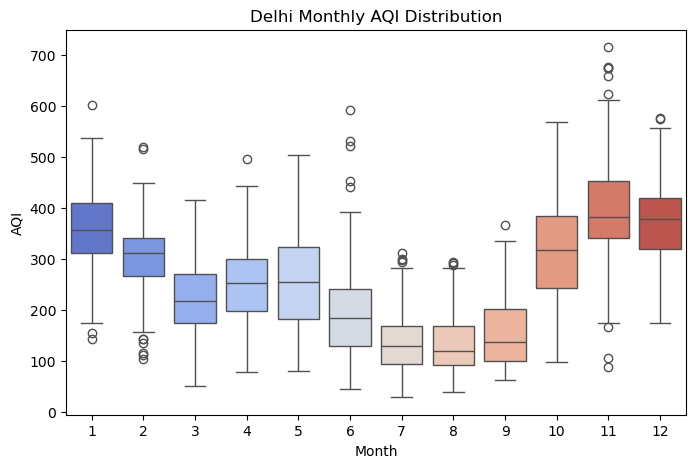

In [15]:
# Seasonal trend for one city (Delhi)
delhi_data['Month'] = delhi_data['Date'].dt.month
plt.figure(figsize=(8,5))
sns.boxplot(x='Month', y='AQI', data=delhi_data, palette="coolwarm")
plt.title("Delhi Monthly AQI Distribution")
plt.show()


Time-series forecasting

In [16]:
# Select city & prepare time series
city = "Delhi"
ts = df[df['City'] == city].copy()

# Keep only date & AQI, remove missing
ts = ts[['Date', 'AQI']].dropna()

# Aggregate daily & fill gaps
ts = ts.groupby('Date').mean().asfreq('D')
ts['AQI'] = ts['AQI'].interpolate()

# Train-test split (last 90 days for test)
train = ts.iloc[:-90]
test  = ts.iloc[-90:]


In [19]:
# Metric function (compatible with old sklearn versions)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def scores(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # manual sqrt
    return {'MAE': mae, 'RMSE': rmse}


In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Simple SARIMAX parameters
order = (1,1,1)
seasonal_order = (1,1,1,7)  # weekly seasonality

model_arima = SARIMAX(train['AQI'], order=order, seasonal_order=seasonal_order,
                      enforce_stationarity=False, enforce_invertibility=False)
res_arima = model_arima.fit(disp=False)

# Forecast
arima_fore = res_arima.get_forecast(steps=len(test))
arima_pred = arima_fore.predicted_mean
arima_ci = arima_fore.conf_int()

print("ARIMA scores:", scores(test['AQI'], arima_pred))


ARIMA scores: {'MAE': 34.6866133666774, 'RMSE': np.float64(47.06448243941614)}


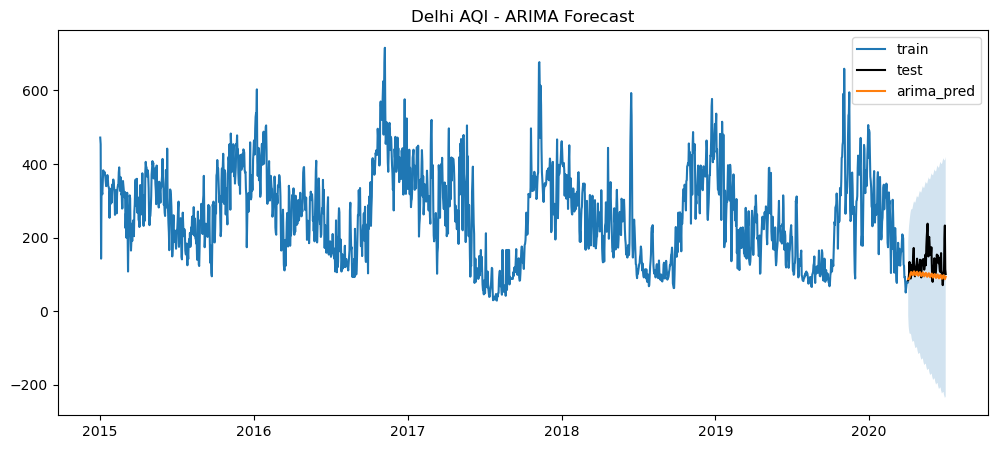

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(train.index, train['AQI'], label='train')
plt.plot(test.index, test['AQI'], label='test', color='k')
plt.plot(test.index, arima_pred, label='arima_pred')
plt.fill_between(test.index, arima_ci['lower AQI'], arima_ci['upper AQI'], alpha=0.2)
plt.title(f"{city} AQI - ARIMA Forecast")
plt.legend()
plt.show()


In [27]:
pip install prophet


Defaulting to user installation because normal site-packages is not writeable
  Using cached prophet-1.1.7-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached cmdstanpy-1.2.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached holidays-0.78-py3-none-any.whl.metadata (46 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.1.7-py3-none-win_amd64.whl (13.3 MB)
Using cached holidays-0.78-py3-none-any.whl (1.2 MB)
Using cached cmdstanpy-1.2.5-py3-none-any.whl (94 kB)
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)

   -------- ------------------------------- 1/5 [importlib_resources]
   -------- ------------------------------- 1/5 [importlib_resources]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [28]:
from prophet import Prophet

# Prepare data for Prophet
prophet_df = train.reset_index().rename(columns={'Date':'ds','AQI':'y'})

m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
m.fit(prophet_df)

future = m.make_future_dataframe(periods=len(test), freq='D')
fcst = m.predict(future)

prophet_pred = fcst.set_index('ds')['yhat'][-len(test):]
print("Prophet scores:", scores(test['AQI'], prophet_pred))


22:31:10 - cmdstanpy - INFO - Chain [1] start processing
22:31:11 - cmdstanpy - INFO - Chain [1] done processing


Prophet scores: {'MAE': 71.49349086198774, 'RMSE': np.float64(81.56634259623567)}


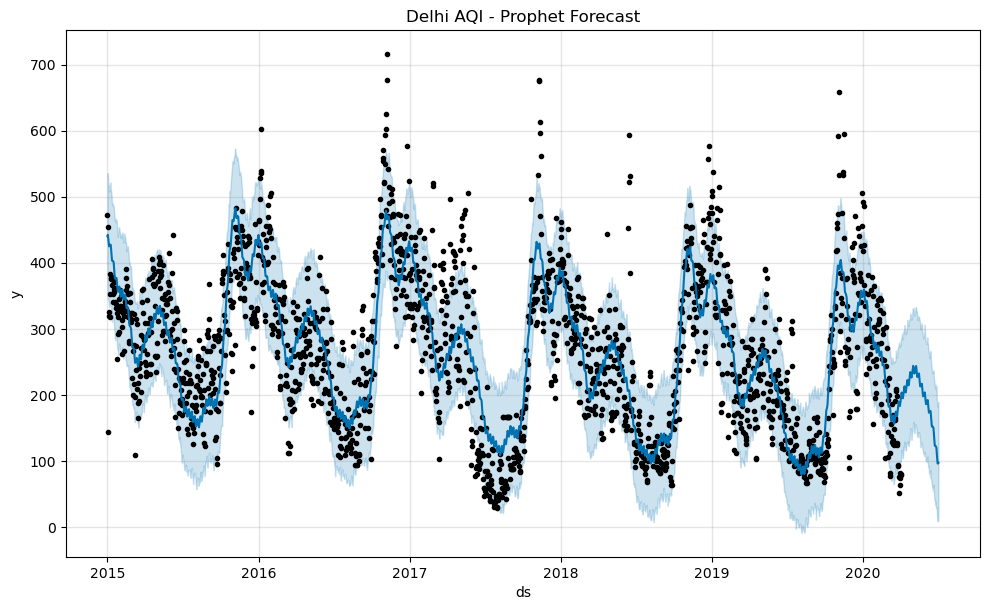

In [29]:
fig = m.plot(fcst)
plt.title(f"{city} AQI - Prophet Forecast")
plt.show()


In [30]:
#Compare Models

results = pd.DataFrame({
    'y_true': test['AQI'],
    'arima': arima_pred.values,
    'prophet': prophet_pred.values
}, index=test.index)

print("ARIMA:", scores(results['y_true'], results['arima']))
print("Prophet:", scores(results['y_true'], results['prophet']))

# Save predictions
results.to_csv(f"aqi_forecasts_{city}.csv")


ARIMA: {'MAE': 34.6866133666774, 'RMSE': np.float64(47.06448243941614)}
Prophet: {'MAE': 71.49349086198774, 'RMSE': np.float64(81.56634259623567)}
